In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [205]:
M = np.zeros((101,101))

for i in range(1,100):
    cnt = max(0,i-6)
    for j in range(cnt,i+0):
        M[i,j] = 1.0/6.0
for i in range(1,7):
    M[100,100-i] = (7.0-i)/6.0
M[100,100] = 1.0

print(M)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.16666667 0.         0.         ... 0.         0.         0.        ]
 [0.16666667 0.16666667 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.16666667 0.         0.        ]
 [0.         0.         0.         ... 0.83333333 1.         1.        ]]


In [193]:
cl = {39:1, 14:4, 31:9, 84:28, 44:36, 67:51, 100:80, 91:71, 
      6:16, 26:47, 11:49, 53:56, 60:64, 73:92, 75:95, 78:98}
cl = {38:1, 14:4, 31:9, 42:21, 84:28, 44:36, 67:51, 91:71, 100:80,
     6:16, 26:47, 11:49, 53:56, 19:62, 60:64, 24:87, 73:93, 75:95,
     78:98}
cl = {1:60,21:53,19:89,27:58,89:72,30:96,60:15,36:28,12:83,50:4}
cl = {38:1, 14:4, 31:9, 6:16, 42:21, 84:28, 44:36,
                  26:47, 11:49, 67:51, 53:56, 19:62, 60:64,
                  91:71, 100:80, 24:87, 73:93, 75:95, 78:98}
cl = {52:12,49:81,58:77,34:84,65:51,51:97,85:91,17:15,16:65,11:1}
cl = {25:46,14:71,30:28,12:4,31:98,9:13,49:15,8:76,46:92,47:29}
T = np.zeros((101,101))

for n in cl:
    T[n, cl[n]] = 1
    #T[cl[n], n] = 1
    
for j in range(101):
    if np.sum(T[:,j]) == 0:
        T[j,j] = 1
print(T)
# for n in range(101):
#     print(np.sum(T[:,n]))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [194]:
e1 = np.zeros((101,1))
e1[0] = 1.0
e1 = e1.reshape(-1,1)

In [195]:
win_prob = []
moves = np.linspace(1,1000,1000)
res = e1.copy()
for n in range(1000):
    res = np.matmul(T, np.matmul(M, res))
    win_prob.append(res[-1])

[0.08884337]


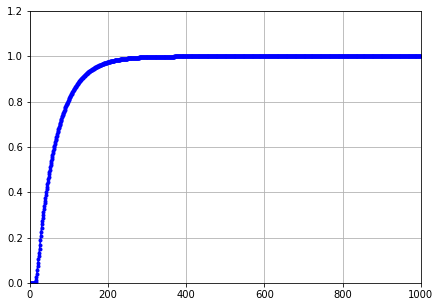

In [196]:
plt.figure(figsize=(7,5))
plt.xlim(1,1000)
plt.ylim(0.0,1.2)
plt.grid()
plt.plot(moves, win_prob, '.-b')
print(win_prob[20])

In [197]:
prob = []
prob.append(0.0)
res = e1.copy()
for n in range(1,1000):
    # res = np.matmul(M, res)
    prob.append(win_prob[n]-win_prob[n-1])

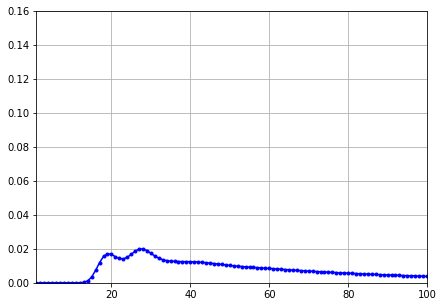

In [198]:
plt.figure(figsize=(7,5))
plt.xlim(1,100)
plt.ylim(0.0,0.16)
plt.grid()
plt.plot(moves,prob,'.-b')

In [199]:
n_moves = 0
for n in range(1,1000):
    n_moves += ((n+1)*(win_prob[n]-win_prob[n-1]))

In [200]:
print(n_moves)

[66.97870537]


In [201]:
A = np.matmul(T,M).T[0:100,0:100]
#A = M[0:100,0:100]

In [202]:
N = np.linalg.inv(np.subtract(np.eye(100),A))

In [204]:
print(np.matmul(N,np.full(100,1).reshape(-1,1))[0])

[66.97870868]
